In [1]:
# Функции для 

In [2]:
import cv2
import mediapipe as mp

In [3]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=1)
mp_drawing = mp.solutions.drawing_utils

In [4]:
def video_now(video_array, fps):
    if not video_array.isOpened():
        print("Ошибка при открытии видеофайла.")

    data_frame_video = list()
    while True:
        ret, frame = video_array.read()
        if not ret:
            break

        if flag_fps == fps:
            res = frame_to_cord(frame)
    
            if len(res)!=18: print("Error!")
            data_frame_video.append(res)

        flag_fps += 1
            
    return data_frame_video

In [678]:
def frame_to_cord(frame):
    # num_block_access_cords = [8, 6, 5, 4, 1, 2, 3, 7, 18, 20, 22, 21, 19, 17]    
    # num_access_cords = list(filter(lambda x: x not in num_block_access_cords, list(range(32))))
                                
    results = pose.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    cord = list()
    for i in num_access_cords:
        try:
            x = results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x
            y = results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y
            
            if x == None or y == None:
                cord.append([0, 0])
            else: cord.append([x, y])
        except:
            cord.append([0, 0])
    
    return cord

In [6]:
# Код для поиска положений P-10 и сохранения Frame

In [7]:
!pip install pandas

In [8]:
import os
import pandas as pd

In [9]:
xml_train = "/Users/odner/Documents/Programming/Hackatons/Hack_24_08_2023/Датасет_Синтез/positions_markup_train.xlsx"

In [10]:
df = pd.read_excel(xml_train)

In [11]:
def frame_p_from_video(video, data_p, frame_id):
    video_path = f"/Users/odner/Documents/Programming/Hackaton's/Hack_24_08_2023/Датасет_Синтез/positions_of_the_golf_swing_train/{video}"
    output_directory = f"/Users/odner/Documents/Programming/Hackaton's/Hack_24_08_2023/positions_of_the_golf_swing_train_frame"
    frame_p = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P8', 'P10']

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Ошибка при открытии видеофайла.")


    flag = 0
    frame_p_flag = 0
    while True:
        ret, frame_video = cap.read()
        if not ret:
            break

    
        if flag in data_p:
            frame_filename = os.path.join(output_directory, f"{frame_p[frame_p_flag]}_{frame_id}.jpg")
            cv2.imwrite(frame_filename, frame_video)
            frame_p_flag += 1
            
        flag += 1
        if frame_p_flag == 8:
            return True
        
    
        

In [131]:
for i in range(len(df)):
    data_p = [df['P1'][i], df['P2'][i], df['P3'][i], df['P4'][i], df['P5'][i], df['P7'][i], df['P8'][i], df['P10'][i]]

    if '-' in data_p:
        continue

    frame_p_from_video(df['Название видео'][i], data_p, i)

AttributeError: 'numpy.ndarray' object has no attribute 'release'

In [12]:
# Код для большого датасета

In [13]:
!pip install scipy youtube-dl pafy pytube

In [14]:
from scipy.io import loadmat
import pandas as pd
import cv2
from pytube import YouTube
import numpy as np
import os

In [15]:
x = loadmat('golfDB.mat')
l = list(x['golfDB'][0])
d = dict()
for idx, k in enumerate(l):
    d["{:3d}".format(idx)] = list(l[idx])
df = pd.DataFrame(d).T
df.columns = ["id","youtube_id","player", "sex", "club","view","slow","events","bbox","split"]

In [16]:
# data format cleansing
df['id'] = df['id'].apply(lambda x: x[0][0])
df['youtube_id'] = df['youtube_id'].apply(lambda x: x[0])
df['player'] = df['player'].apply(lambda x: x[0])
df['sex'] = df['sex'].apply(lambda x: x[0])
df['club'] = df['club'].apply(lambda x: x[0])
df['view'] = df['view'].apply(lambda x: x[0])
df['slow'] = df['slow'].apply(lambda x: x[0][0])
df['events'] = df['events'].apply(lambda x: x[0])
df['bbox'] = df['bbox'].apply(lambda x: x[0])
df['split'] = df['split'].apply(lambda x: x[0][0])

In [17]:
#df.index = df.index.astype(int)
#df.to_pickle('golfDB.pkl')

In [18]:
df

,id,youtube_id,player,sex,club,view,slow,events,bbox,split
0,0,f1BWA5F87Jc,SANDRA GAL,f,driver,down-the-line,0,"[408, 455, 473, 476, 490, 495, 498, 501, 514, ...","[0.09765625000000001, 0.006944444444444444, 0....",3
1,1,f1BWA5F87Jc,SANDRA GAL,f,driver,down-the-line,1,"[814, 854, 917, 931, 988, 1006, 1019, 1030, 10...","[0.039062500000000014, 0.0006944444444444445, ...",3
2,2,tA1iotgtMyc,CHRIS DIMARCO,m,driver,down-the-line,0,"[521, 659, 678, 683, 692, 696, 698, 701, 715, ...","[0.165625, 0.0006944444444444445, 0.48359375, ...",3
3,3,tA1iotgtMyc,CHRIS DIMARCO,m,driver,down-the-line,1,"[1106, 1190, 1244, 1264, 1300, 1313, 1324, 133...","[0.18515625, 0.0006944444444444445, 0.465625, ...",3
4,4,wDCKLePrwHA,BROOKE HENDERSON,f,driver,down-the-line,0,"[157, 170, 183, 188, 197, 201, 205, 207, 220, ...","[0.11015625, 0.0006944444444444445, 0.4984375,...",3
...,...,...,...,...,...,...,...,...,...,...
1395,1395,bXqJtcWylfQ,ARIYA JUTANUGARN,f,iron,down-the-line,1,"[867, 887, 949, 968, 1001, 1017, 1029, 1039, 1...","[0.146875, 0.0006944444444444445, 0.4203125, 0...",1
1396,1396,TtxGGIzrqWI,KENNY PERRY,m,driver,face-on,0,"[121, 394, 407, 414, 427, 431, 435, 437, 452, ...","[0.16796875, 0.0006944444444444445, 0.7171875,...",3
1397,1397,TtxGGIzrqWI,KENNY PERRY,m,driver,face-on,1,"[875, 895, 967, 997, 1045, 1061, 1076, 1084, 1...","[0.16796875, 0.0006944444444444445, 0.696875, ...",3
1398,1398,TtxGGIzrqWI,KENNY PERRY,m,driver,down-the-line,0,"[2585, 2890, 2904, 2912, 2925, 2929, 2932, 293...","[0.17578125, 0.0006944444444444445, 0.4203125,...",3


In [19]:
def get_from_youtube(url_id, frame_id, events):
    try:
        video_url = f'https://www.youtube.com/watch?v={url_id}'
        yt = YouTube(video_url)
        video_stream = yt.streams.get_lowest_resolution()
        cap = cv2.VideoCapture(video_stream.url)

        event = events.copy()
    
        if not cap.isOpened():
            print("Ошибка при открытии видеофайла.")
            
        event = np.delete(event, 8)
        event = np.delete(event, 6)
    
        output_directory = f"/Users/odner/Documents/Programming/Hackaton's/Hack_24_08_2023/positions_of_the_golf_swing_train_frame"
        frame_p = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P8', 'P10']
    
        flag = 0
        frame_p_flag = 0
        while True:
            ret, frame = cap.read()
            if not ret:
                break
    
            if flag in event:
                frame_filename = os.path.join(output_directory, f"{frame_p[frame_p_flag]}_{int(frame_id) + 85}.jpg")
                cv2.imwrite(frame_filename, frame)
                frame_p_flag += 1
                
            flag += 1
            if frame_p_flag == 8:
                return True
    except Exception as e:
        print(f"Error:{url_id}", e)

In [75]:
for i in range(len(df)):
    get_from_youtube(df['youtube_id'][i], df['id'][i], df['events'][i])

Error:bF8A2zdAfAs bF8A2zdAfAs is age restricted, and can't be accessed without logging in.
Error:bF8A2zdAfAs bF8A2zdAfAs is age restricted, and can't be accessed without logging in.
Error:DZ9FpPXrD74 DZ9FpPXrD74 is age restricted, and can't be accessed without logging in.
Error:DZ9FpPXrD74 DZ9FpPXrD74 is age restricted, and can't be accessed without logging in.
Error:DZ9FpPXrD74 DZ9FpPXrD74 is age restricted, and can't be accessed without logging in.
Error:ppDvhlGr5nI ppDvhlGr5nI is age restricted, and can't be accessed without logging in.
Error:ppDvhlGr5nI ppDvhlGr5nI is age restricted, and can't be accessed without logging in.
Error:ZivMJ6nSS-E ZivMJ6nSS-E is age restricted, and can't be accessed without logging in.
Error:ZivMJ6nSS-E ZivMJ6nSS-E is age restricted, and can't be accessed without logging in.
Error:cshnEYiQggc cshnEYiQggc is age restricted, and can't be accessed without logging in.
Error:cshnEYiQggc cshnEYiQggc is age restricted, and can't be accessed without logging in.

In [166]:
frame_p = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P8', 'P10']
data_set_all_pose = list()
for p_pose in frame_p:
    data_set_pose = list()
    for id_pose in range(1485):
        frame_train_path = f"/Users/odner/Documents/Programming/Hackatons/Hack_24_08_2023/positions_of_the_golf_swing_train_frame/{p_pose}_{id_pose}.jpg"
        
        if os.path.exists(frame_train_path):
            frame_pose_image = cv2.imread(frame_train_path)
            data_set_pose.append(frame_to_cord(frame_pose_image))
        if id_pose in [100, 500, 1000, 1400]:
            print(f'Complete id_pose: {id_pose}')

    print(f'Complete p_pose: {p_pose}')
    data_set_all_pose.append(data_set_pose)

Complete id_pose: 100
Complete id_pose: 500
Complete id_pose: 1000
Complete id_pose: 1400
Complete p_pose: P1
Complete id_pose: 100
Complete id_pose: 500
Complete id_pose: 1000
Complete id_pose: 1400
Complete p_pose: P2
Complete id_pose: 100
Complete id_pose: 500
Complete id_pose: 1000
Complete id_pose: 1400
Complete p_pose: P3
Complete id_pose: 100
Complete id_pose: 500
Complete id_pose: 1000
Complete id_pose: 1400
Complete p_pose: P4
Complete id_pose: 100
Complete id_pose: 500
Complete id_pose: 1000
Complete id_pose: 1400
Complete p_pose: P5
Complete id_pose: 100
Complete id_pose: 500
Complete id_pose: 1000
Complete id_pose: 1400
Complete p_pose: P6
Complete id_pose: 100
Complete id_pose: 500
Complete id_pose: 1000
Complete id_pose: 1400
Complete p_pose: P8
Complete id_pose: 100
Complete id_pose: 500
Complete id_pose: 1000
Complete id_pose: 1400
Complete p_pose: P10


In [167]:
 # Обучение системы на P-10 system

In [168]:
!pip install -U scikit-learn

In [169]:
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [170]:
x_data_test = np.array(data_set_all_pose.copy())

In [171]:
np.shape(x_data_test)

(8, 1424, 18, 2)

In [172]:
x=[]
y=[]
p_pose_element = [1, 2, 3, 4, 5, 6, 8, 10] # [1, 2, 3, 4, 5, 6, 8, 10]
counter = 0

for p_pose_data in x_data_test:
    for pic in p_pose_data:
        dots=[]
        for i in range(18):
            dots.append(pic[i][0])
            dots.append(pic[i][1])
        x.append(dots)
        y.append(counter)
    counter+=1

In [213]:
x_data = x.copy()
y_data = y.copy()

In [214]:
print(np.asarray(x_data).shape)
print(np.asarray(y_data).shape)

(11392, 36)
(11392,)


In [215]:
print(x_data)
print(y_data)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [216]:
np.save("/Users/odner/Documents/Programming/Hackatons/Hack_24_08_2023/data/x_data.npy", x_data)
np.save("/Users/odner/Documents/Programming/Hackatons/Hack_24_08_2023/data/y_data.npy", y_data)

In [217]:
x_data = np.load("/Users/odner/Documents/Programming/Hackatons/Hack_24_08_2023/data/x_data.npy")
y_data = np.load("/Users/odner/Documents/Programming/Hackatons/Hack_24_08_2023/data/y_data.npy")

In [623]:
x_data, y_data = shuffle(x_data, y_data)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.01, random_state=21)

In [626]:
lin_clf = svm.SVC(kernel='poly', probability=True)
lin_clf.fit(x_train, y_train)

SVC(kernel='poly', probability=True)

In [627]:
import numpy as np
correct = 0
y_test, x_test = y_test, x_test


for i in range(len(x_test)):
    dec = lin_clf.predict([x_test[i]])
    if dec==y_test[i]: correct+=1
print(correct/len(x_test))

0.8421052631578947


In [628]:
with open('./model_pose_842.pkl','wb') as f:
    pickle.dump(lin_clf, f)

In [263]:
lin_clf.predict([x_test[3]])

array([2])

In [201]:
probabilities = lin_clf.predict_proba([x_test[1]])

AttributeError: predict_proba is not available when  probability=False

In [193]:
probabilities

array([[9.81271248e-05, 1.09871462e-04, 1.95275531e-02, 9.53624469e-01,
        1.51357147e-02, 9.20989069e-03, 1.61675969e-03, 6.77613802e-04]])

In [194]:
normalized_probabilities

array([[  2.52525599,   3.7340236 , 100.        ,   0.33583257,
          0.        ,   3.63214951,   0.11160011,   0.11570045]])

In [195]:
y_test[3]

1

In [196]:
import pickle

In [619]:
np.load('./model_pose_833.pkl', allow_pickle=True)

SVC(kernel='poly', probability=True)

In [382]:
with open('./model_pose_833.pkl','wb') as f:
    pickle.dump(lin_clf, f)
    lin_clf.predict_proba([x_test[1]])

AttributeError: predict_proba is not available when  probability=False

In [137]:
import numpy as np
correct = 0
y_test, x_test = y_test, x_test


for i in range(len(x_test)):
    dec = lin_clf.predict([x_test[i]])
    if dec==y_test[i]: correct+=1
print(correct/len(x_test))

0.7719298245614035


In [138]:
x_data = np.load("/Users/odner/Documents/Programming/Hackatons/Hack_24_08_2023/data/x_data.npy")
y_data = np.load("/Users/odner/Documents/Programming/Hackatons/Hack_24_08_2023/data/y_data.npy")

In [41]:
x_data, y_data = shuffle(x_data, y_data)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.01, random_state=21)

In [42]:
print(np.asarray(x_data).shape)

(11392, 36)


In [43]:
from sklearn import svm
from sklearn.calibration import CalibratedClassifierCV

In [44]:
# Создание SVM
clf = svm.SVC(kernel='poly', probability=True)
# Обучение модели на данных
clf.fit(x_train, y_train)

SVC(kernel='poly', probability=True)

In [45]:
# Калибровка модели для получения вероятностей
calibrated_clf = CalibratedClassifierCV(clf, method='sigmoid')
calibrated_clf.fit(x_train, y_train)

CalibratedClassifierCV(estimator=SVC(kernel='poly', probability=True))

In [46]:
print(x_test[0])

[0.5350855  0.39459845 0.52640325 0.39795274 0.52303255 0.39640146
 0.51589102 0.41525227 0.43019378 0.39334008 0.5146597  0.46120116
 0.40183702 0.44670734 0.51808131 0.4703151  0.46578115 0.47765818
 0.45375833 0.50141764 0.40076837 0.49655268 0.47701603 0.57083344
 0.43345758 0.5800615  0.44384748 0.63909698 0.42609867 0.66199416
 0.4274416  0.65089995 0.41276088 0.67488956 0.4919481  0.66476059]


In [99]:
for check in range(len(x_test)):
    probabilities = calibrated_clf.predict_proba([x_test[check]])
    normalized_probabilities = (probabilities - probabilities.min()) / (probabilities.max() - probabilities.min()) * 100

    frame_pp = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P8', 'P10']

    maxx = 0
    maxx_index = 0
    for answer in normalized_probabilities:
        for index in range(len(answer)):
            if maxx < float(answer[index]):
                maxx = float(answer[index])
                maxx_index = index
    # print(list(filter(lambda x: float(x), probabilities[0])))
    print(f'answer_model = {frame_pp[maxx_index], maxx}% ; answer = {frame_pp[y_test[check]]} ; {frame_pp[y_test[check]] == frame_pp[maxx_index]}') 

answer_model = ('P10', 100.0)% ; answer = P10 ; True
answer_model = ('P5', 100.0)% ; answer = P5 ; True
answer_model = ('P4', 100.0)% ; answer = P4 ; True
answer_model = ('P6', 100.0)% ; answer = P6 ; True
answer_model = ('P1', 100.0)% ; answer = P2 ; False
answer_model = ('P8', 100.0)% ; answer = P8 ; True
answer_model = ('P3', 100.0)% ; answer = P3 ; True
answer_model = ('P3', 100.0)% ; answer = P4 ; False
answer_model = ('P5', 100.0)% ; answer = P5 ; True
answer_model = ('P2', 100.0)% ; answer = P1 ; False
answer_model = ('P8', 100.0)% ; answer = P8 ; True
answer_model = ('P10', 100.0)% ; answer = P1 ; False
answer_model = ('P2', 100.0)% ; answer = P2 ; True
answer_model = ('P3', 100.0)% ; answer = P3 ; True
answer_model = ('P6', 100.0)% ; answer = P6 ; True
answer_model = ('P1', 100.0)% ; answer = P1 ; True
answer_model = ('P2', 100.0)% ; answer = P1 ; False
answer_model = ('P5', 100.0)% ; answer = P5 ; True
answer_model = ('P2', 100.0)% ; answer = P2 ; True
answer_model = ('P2', 1

In [35]:
probabilities = calibrated_clf.predict_proba([x_test[0]])

In [36]:
normalized_probabilities = (probabilities - probabilities.min()) / (probabilities.max() - probabilities.min()) * 100

[[1.57217828e-01 2.95524798e-01 0.00000000e+00 1.32507889e+00
  1.00978961e+01 9.53913900e-02 1.00000000e+02 4.73292278e+01]]


In [39]:
for answer in normalized_probabilities:
    print(f'P1: {float(answer[0])}')
    print(f'P2: {float(answer[1])}')
    print(f'P3: {float(answer[2])}')
    print(f'P4: {float(answer[3])}')
    print(f'P5: {float(answer[4])}')
    print(f'P6: {float(answer[5])}')
    print(f'P8: {float(answer[6])}')
    print(f'P10: {float(answer[7])}')

P1: 0.1572178280849077
P2: 0.2955247980901574
P3: 0.0
P4: 1.325078893865379
P5: 10.097896110011819
P6: 0.09539138996351378
P8: 100.0
P10: 47.32922779242107


In [40]:
y_test[0]

10

In [ ]:
np.load('./model_pose_833.pkl', allow_pickle=True)

In [ ]:
array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Indices of the items you want to delete
indices_to_delete = [1, 3, 6]

# Delete the items at the specified indices
new_array = np.delete(array, indices_to_delete)

In [ ]:
import numpy as np
from os.path import dirname, join
from PIL import Image, ImageDraw
from joblib import dump, load


def check_person(frame_all_cord_pose):
    frame_all_cord_pose = np.array(frame_all_cord_pose)[:-1]
    block_access_cords = [1, 2, 3, 4, 5, 6, 7, 8, 18, 20, 22, 21, 19, 17]
    frame_access_cord_pose = np.delete(frame_all_cord_pose, block_access_cords, axis=0)
    frame_access_cord_pose = np.concatenate(frame_access_cord_pose)
    

    if len(frame_access_cord_pose[frame_access_cord_pose == None]) >= 6:
        return False
    return True

def racurs_model(frame_all_cord_pose):
    frame_all_cord_pose = np.array(frame_all_cord_pose)[:-1]
    block_access_cords = [1, 2, 3, 4, 5, 6, 7, 8, 18, 20, 22, 21, 19, 17]
    frame_access_cord_pose = np.delete(frame_all_cord_pose, block_access_cords, axis=0)
    frame_access_cord_pose = np.concatenate(frame_access_cord_pose)
    frame_access_cord_pose[frame_access_cord_pose == None] = 0

    with open(join(dirname(__file__), "model_racurs.joblib"), "rb") as f:
        model_racurs = load(f)

    answer_racurs = model_racurs.predict([frame_access_cord_pose])

    return answer_racurs

def video_model(frame_all_cord_pose):
    frame_all_cord_pose = np.array(frame_all_cord_pose)[:-1]
    block_access_cords = [1, 2, 3, 4, 5, 6, 7, 8, 18, 20, 22, 21, 19, 17]
    frame_access_cord_pose = np.delete(frame_all_cord_pose, block_access_cords, axis=0)
    frame_access_cord_pose = np.concatenate(frame_access_cord_pose)
    frame_access_cord_pose[frame_access_cord_pose == None] = 0

    with open(join(dirname(__file__), "model_video.joblib"), "rb") as f:
        model_video = load(f)
    
    answer_video = np.argmax(model_video.predict_proba([frame_access_cord_pose]))

    return answer_video

In [ ]:
import numpy as np
from os.path import dirname, join
from PIL import Image, ImageDraw
from joblib import dump, load

def distance(x1, y1, x2, y2):
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)

def pose_codr_model(data_frame_cord_pose):
    data_frame_cord_pose = np.array(data_frame_cord_pose)
    
    data_p_pose = list()
    for frame_all_cord_pose in frame_all_cord_pose:
        frame_all_cord_pose = np.array(frame_all_cord_pose)[:-1]
        block_access_cords = [1, 2, 3, 4, 5, 6, 7, 8, 18, 20, 22, 21, 19, 17]
        frame_access_cord_pose = np.delete(frame_all_cord_pose, block_access_cords, axis=0)
        frame_access_cord_pose = np.concatenate(frame_access_cord_pose)
        frame_access_cord_pose[frame_access_cord_pose == None] = 0
        data_p_pose.append(frame_access_cord_pose)
        
    with open(join(dirname(__file__), "model_pose.joblib"), "rb") as f:
        model_pose = load(f)

    answer_pose = list(model_pose.predict_proba(data_p_pose))

    frames_of_poses = [0, 0, 0, 0, 0, 0, 0, 0]
    sure_of_poses = [0, 0, 0, 0, 0, 0, 0, 0]

    for i in range(len(answer_pose)):
        for num in range(8):
            if(answer_pose[i][num] > sure_of_poses[num]):
                sure_of_poses[num] = answer_pose[i][num]
                frames_of_poses[num] = i

    return frames_of_poses


def pose_bytearray_model(data_bytearray_pose, frames_of_poses):
    img_P1, cord_P1 = np.frombuffer(data_bytearray_pose[0], dtype=np.uint8), frames_of_poses[0]
    img_P4, cord_P4 = np.frombuffer(data_bytearray_pose[3], dtype=np.uint8), frames_of_poses[3]

    width, height = img_P4.size
    draw = ImageDraw.Draw(img_P4)

    x1_1, y1_1 = cord_P1[0][0] * width, cord_P1[0][1] * height
    x1_4, y1_4 = cord_P4[0][0] * width, cord_P4[0][1] * height
    
    distance_between_dots = distance(x1_1, y1_1, x1_4, y1_4)

    flag_of_mistake = 0
    if(distance_between_dots >= max(width, height)*0.1):
        draw = ImageDraw.Draw(img_P4)
        draw.line((x1_1, y1_1,x1_4,y1_4), fill='green', width=3)

        img_P4 = img_P4.tobytes()
        flag_of_mistake = 0
        return [False, img_P4]
    return [True, '0']
        
    
    
    

        

        

        

In [900]:
model_pose = np.load('./model/model_pose_842.pkl', allow_pickle=True)
answer_racurs = model_racurs.predict([x_data[0]])

In [18]:
with open(join(dirname(file), "model/model_video.pkl"), 'rb') as f:
    model_video = pickle.load(f)
with open(join(dirname(file), "model/model_racurs.pkl"), 'rb') as f:
    model_racurs = pickle.load(f)

NameError: name 'file' is not defined

In [27]:
# model_video = np.load('./model/model_video.pkl', allow_pickle=True)
# model_racurs = np.load('./model/model_racurs.pkl', allow_pickle=True)
model_pose = np.load('./model_pose_842.pkl', allow_pickle=True)

In [28]:
model_pose

SVC(kernel='poly', probability=True)

In [21]:
!pip install joblib

In [29]:
from joblib import dump, load
# dump(model_video, 'model_video.joblib')
# dump(model_racurs, 'model_racurs.joblib')
dump(model_pose, 'model_pose.joblib')

['model_pose.joblib']

In [20]:
model_video

SVC(kernel='poly', probability=True)

In [ ]:
model_filename = 'trained_model.joblib'
dump(model, model_filename)

In [15]:
asdffdas = np.array([[1,2], [3,4], [5,6], [None,None]])
asdffdas = np.concatenate(asdffdas)
print(len(asdffdas[asdffdas == None]) != 0)

True


In [13]:
len(x_data[0])

36

In [10]:
frame_all_cord_pose = np.array([[1,2],[3,4],[5,6],[7,8]])
block_access_cords = [1, 3]
frame_access_cord_pose = np.delete(frame_all_cord_pose, block_access_cords, axis=0)
print(frame_access_cord_pose)
frame_access_cord_pose = np.concatenate(frame_access_cord_pose)

[[1 2]
 [5 6]]


In [7]:
print(frame_access_cord_pose)

[1 2 5 6]


In [890]:
qawsed = np.array([1, None, 3, None])
qawsed[qawsed == None] = 0

In [891]:
qawsed

array([1, 0, 3, 0], dtype=object)

In [ ]:
import pickle
from sklearn import svm
import cv2
import mediapipe as mp
import os
import io
import PIL.Image as Image

def frame_to_cord_for_nn(frame):
    num_block_access_cords = [8, 6, 5, 4, 1, 2, 3, 7, 18, 20, 22, 21, 19, 17]
    num_access_cords = list(filter(lambda x: x not in num_block_access_cords, list(range(32))))

                                
    results = pose.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
    
    cord = list()
    for i in num_access_cords:
        try:
            x = results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x
            y = results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y
            if x==None or y==None:
                cord.append([-1, -1])
            else: cord.append([x, y])
        except:
            cord.append([-1, -1])
    
    return cord,img_copy

with open('./model_racurs.pkl', 'rb') as f:
    lin_clf = pickle.load(f)
    
def get_racurs_from_image(bytes):
    count = 0
    human_is_there = True
    frame = Image.open(io.BytesIO(bytes))
    coords_of_frame,frame = frame_to_cord_for_nn(frame)
    for j in range (18):
        if (coords_of_frame[i][j][0] == -1 or coords_of_frame[i][j][1] == -1): count+=1
        dots.append(coords_of_frame[i][j][0])
        dots.append(coords_of_frame[i][j][1])
    if count>=4:
        human_is_there = False
    res = lin_clf.predict([tuple(dots)])
    
    img_byte_arr = io.BytesIO()
    frame.save(img_byte_arr, format='PNG')
    img_byte_arr = string(img_byte_arr.getvalue())
    
    return img_byte_arr,human_is_there,res

In [2]:
import numpy as np

In [819]:
data_test = np.array([[1,2],[3,4],[5,6]])

In [821]:
np.concatenate(data_test)

array([1, 2, 3, 4, 5, 6])

In [822]:
model = np.load('./model_pose_833.pkl', allow_pickle=True)
model.predict_proba()

In [ ]:
model.predict_proba()

In [644]:
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

from scipy.io import loadmat
import pandas as pd
import cv2
from pytube import YouTube
import numpy as np
import os

In [645]:
frame_p = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P8', 'P10']
data_set_all_pose = list()
for p_pose in frame_p:
    data_set_pose = list()
    for id_pose in range(1485):
        frame_train_path = f"/Users/odner/Documents/Programming/Hackatons/Hack_24_08_2023/positions_of_the_golf_swing_train_frame/{p_pose}_{id_pose}.jpg"
        
        if os.path.exists(frame_train_path):
            frame_pose_image = cv2.imread(frame_train_path)
            data_set_pose.append(frame_to_cord(frame_pose_image))
        if id_pose in [100, 500, 1000, 1400]:
            print(f'Complete id_pose: {id_pose}')

    print(f'Complete p_pose: {p_pose}')
    data_set_all_pose.append(data_set_pose)

Complete id_pose: 100
Complete id_pose: 500
Complete id_pose: 1000
Complete id_pose: 1400
Complete p_pose: P1
Complete id_pose: 100
Complete id_pose: 500
Complete id_pose: 1000
Complete id_pose: 1400
Complete p_pose: P2
Complete id_pose: 100
Complete id_pose: 500
Complete id_pose: 1000
Complete id_pose: 1400
Complete p_pose: P3
Complete id_pose: 100
Complete id_pose: 500
Complete id_pose: 1000
Complete id_pose: 1400
Complete p_pose: P4
Complete id_pose: 100
Complete id_pose: 500
Complete id_pose: 1000
Complete id_pose: 1400
Complete p_pose: P5
Complete id_pose: 100
Complete id_pose: 500
Complete id_pose: 1000
Complete id_pose: 1400
Complete p_pose: P6
Complete id_pose: 100
Complete id_pose: 500
Complete id_pose: 1000
Complete id_pose: 1400
Complete p_pose: P8
Complete id_pose: 100
Complete id_pose: 500
Complete id_pose: 1000
Complete id_pose: 1400
Complete p_pose: P10


In [736]:
x_data_test = np.array(data_set_all_pose.copy())

In [737]:
print(np.asarray(x_data_test).shape)

(8, 1424, 18, 2)


In [738]:
x_dots_0 = list()
x_dots_1 = list()
x_dots_2 = list()

y_dots_0 = list()
y_dots_1 = list()
y_dots_2 = list()

for p_pose_data in range(len(x_data_test)):
    if p_pose_data == 0:
        for pic in x_data_test[p_pose_data]:
            dots_1 = list()
            for i in range(18):
                dots_1.append(pic[i][0])
                dots_1.append(pic[i][1])
            x_dots_1.append(dots_1)
            y_dots_1.append(1)
                
    elif p_pose_data == 7:
        for pic in x_data_test[p_pose_data]:
            dots_2 = list()
            for i in range(18):
                dots_2.append(pic[i][0])
                dots_2.append(pic[i][1])
            x_dots_2.append(dots_2)
            y_dots_2.append(2)
    else:
        for pic in x_data_test[p_pose_data]:
            dots_0 = list()
            for i in range(18):
                dots_0.append(pic[i][0])
                dots_0.append(pic[i][1])
            x_dots_0.append(dots_0)
            y_dots_0.append(0)

In [739]:
x_dots_0, y_dots_0 = shuffle(x_dots_0, y_dots_0)

In [740]:
x_dots_0, y_dots_0 = x_dots_0[:2000], y_dots_0[:2000]

In [741]:
x_data = np.concatenate((x_dots_0, x_dots_1, x_dots_2), axis=0)
y_data = np.concatenate((y_dots_0, y_dots_1, y_dots_2), axis=0)

In [742]:
print(np.asarray(x_data).shape)

(4848, 36)


In [743]:
print(np.asarray(x_data).shape)
print(np.asarray(y_data).shape)

(4848, 36)
(4848,)


In [744]:
np.save("/Users/odner/Documents/Programming/Hackatons/Hack_24_08_2023/data/x_data.npy", x_data)
np.save("/Users/odner/Documents/Programming/Hackatons/Hack_24_08_2023/data/y_data.npy", y_data)

In [3]:
x_data = np.load("/Users/odner/Documents/Programming/Hackatons/Hack_24_08_2023/data/x_data.npy")
y_data = np.load("/Users/odner/Documents/Programming/Hackatons/Hack_24_08_2023/data/y_data.npy")

In [4]:
model_racurs = np.load('./model/model_racurs.pkl', allow_pickle=True)
answer_racurs = model_racurs.predict([x_data[0]])

In [867]:
x_data, y_data = shuffle(x_data, y_data)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.01, random_state=21)

In [870]:
lin_clf = svm.SVC(kernel='poly', probability=True)
lin_clf.fit(x_train, y_train)

SVC(kernel='poly', probability=True)

In [871]:
correct = 0
y_test, x_test = y_test, x_test


for i in range(len(x_test)):
    dec = lin_clf.predict([x_test[i]])
    if dec==y_test[i]: correct+=1
print(correct/len(x_test))

0.9387755102040817


In [872]:
with open('./model_check_P1_P10_938.pkl','wb') as f:
    pickle.dump(lin_clf, f)

In [827]:
np.load('./model_check_P1_P10_918.pkl', allow_pickle=True)

SVC(kernel='poly', probability=True)

In [881]:
model = np.load('./model_check_P1_P10_938.pkl', allow_pickle=True)
ansver = model.predict_proba([x_test[8]])
ansver

array([[0.01560647, 0.0027861 , 0.98160742]])

In [884]:
np.argmax(ansver)

2

In [46]:
import cv2
import matplotlib.pyplot as plt

In [189]:
frame_path = './tet/2.jpg'  # Replace with the actual image file path
frame = cv2.imread(frame_path)

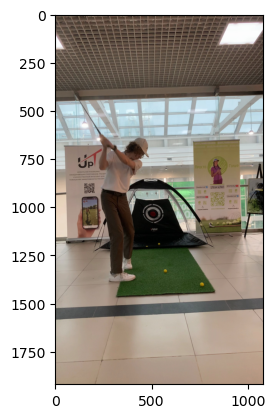

In [190]:
image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [191]:
blurred = cv2.GaussianBlur(frame, (5,5), 0)
greenLower = (27, 105, 145)
greenUpper = (90, 255, 255)
hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, greenLower, greenUpper)

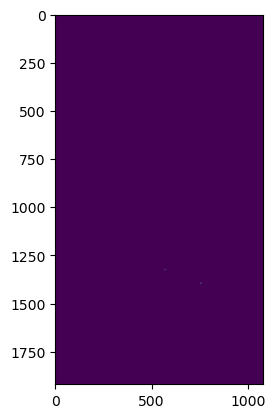

In [192]:
plt.imshow(mask)

In [193]:
cv2.imshow('image', img)

NameError: name 'img' is not defined

In [54]:
blurred = cv2.GaussianBlur(frame, (5,5), 0)

In [194]:
!pip install opencv-python tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/b9/ab/a04186eaaeaa1969b4d81dc74aa440f98c8eb7c92b0cd33ceda37b70d46e/tensorflow-2.13.0-cp38-cp38-macosx_12_0_arm64.whl.metadata
ERROR: Could not find a version that satisfies the requirement keras-yolo3 (from versions: none)
ERROR: No matching distribution found for keras-yolo3


In [198]:
!pip install keras-yolo3

ERROR: Could not find a version that satisfies the requirement keras-yolo3 (from versions: none)
ERROR: No matching distribution found for keras-yolo3


In [196]:
import cv2
from keras_yolo3.yolo import YOLO

# Загрузка модели YOLO
yolo = YOLO()

ModuleNotFoundError: No module named 'keras_yolo3'

In [ ]:
image_path = 'путь/к/вашему/изображению.jpg'  # Замените на фактический путь к файлу изображения
image = cv2.imread(image_path)

In [ ]:
# Нарисовать ограничивающие рамки на изображении
for box, score, class_id in zip(boxes, scores, classes):
    top, left, bottom, right = box
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    label = f'Мяч для гольфа: {score:.2f}'
    cv2.putText(image, label, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Показать результат
cv2.imshow('Обнаружение мяча для гольфа', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [201]:
import os
import numpy as np

video_folder = './Тест'
video_names = [filename for filename in os.listdir(video_folder) if filename.endswith('.mp4')]

In [207]:
print(len(video_names))

33


In [206]:
for file_name_to_check in video_names:
    file_path = os.path.join('./positions_of_the_golf_swing_train', file_name_to_check)
    
    if os.path.exists(file_path):
        print(f"The file '{file_name_to_check}' exists in the folder.")
    else:
        print(f"The file '{file_name_to_check}' does not exist in the folder.")

The file 'c0b93372-0b19-430d-a92f-5de0472a2a35.mp4' does not exist in the folder.
The file '949e17f3-2818-4815-bb1c-f26a0c95d179.mp4' does not exist in the folder.
The file 'f18a27f8-6460-401f-8c67-33d09c27b87b.mp4' does not exist in the folder.
The file '5badc618-782b-43f2-86e6-365279981524.mp4' does not exist in the folder.
The file 'f8f1e5c4-068d-405d-8953-d640aaa08517.mp4' does not exist in the folder.
The file '229f1a5d-a573-41d2-a1c5-155bd3b643dc.mp4' does not exist in the folder.
The file '0ae17d29-242b-40ec-bff6-fe6b23ac8824.mp4' does not exist in the folder.
The file 'a73afde3-ea62-40bb-b6e4-4008a4d8ce0a.mp4' does not exist in the folder.
The file 'bae78440-7c67-4dfc-bc20-bfbb9dd54255.mp4' does not exist in the folder.
The file '00858b25-c5c3-4092-8ae7-5c61ada25097.mp4' does not exist in the folder.
The file '27e9571c-2170-4178-90a8-a1108aa3a977.mp4' does not exist in the folder.
The file 'e2fb434c-7c54-483c-990f-e0f39d61a2ff.mp4' does not exist in the folder.
The file '9c4443